In [3]:
include("./PeriodicKdV.jl")
using .PeriodicKdV
using LinearAlgebra, Plots, Printf
using ApproxFun, Elliptic

# Try using ApproxFun

In [38]:
## All global variables for this computation
kell = 0.7
κ = 1.0
tspan = (0.0,2*Elliptic.K(kell^2)/κ)
q0 = x -> 2*kell^2*κ^2*Elliptic.Jacobi.cn(κ*(x-tspan[2]/2),kell^2)^2

#21 (generic function with 1 method)

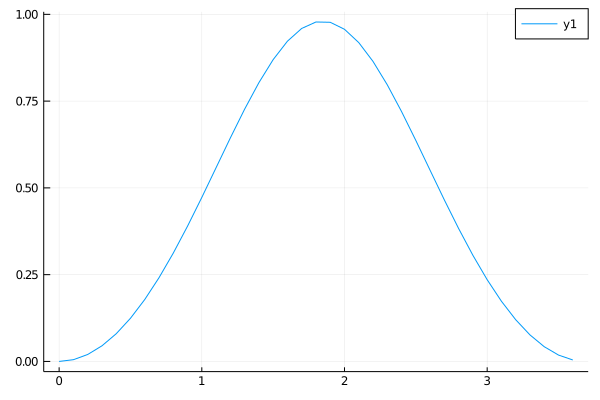

In [39]:
x = 0:.1:tspan[2]
plot(x, map(q0,x))

In [40]:
gaps,zs,α1 = PeriodicKdV.ScatteringData(q0,tspan[2],200,1e-12,5);

In [41]:
α1 |> display
-kell^2 |> display

-0.489999999999666

-0.48999999999999994

In [42]:
1-kell^2

0.51

In [45]:
β1 = gaps[1,1] .- α1 |> display
α2 = gaps[1,2] - α1

1.0000000000006215

1.489999999998853

In [44]:
pole = zs[1,1] - α1

0.9999999999993425

In [3]:
function T(λ)
    A = [B               0;
         B*D             0;
         0               B;
         0               B*D;
         -D^2-(Q0+λ)*I   0;
         -I              -D^2-(Q0+λ)*I];
    u,udλ = A\[1;0;0;0;0;0]
    v,vdλ = A\[0;1;0;0;0;0]
    return [u(tspan[2]) v(tspan[2]);
    u'(tspan[2]) v'(tspan[2]);
    udλ(tspan[2]) vdλ(tspan[2]);
    udλ'(tspan[2]) vdλ'(tspan[2])]
end

function Δ(λ)
    Ts = T(λ)
   (Ts[1,1] + Ts[2,2])/2
end

function Δ_newton_step(λ,σ)
    Ts = T(λ)
    δ = (Ts[1,1] + Ts[2,2] - 2*σ)/(Ts[3,1] + Ts[4,2])
    (λ - δ,δ)
end

function Δroot(λ,σ)
    λ0 = λ
    for i = 1:100
        (λ0,δ) = Δ_newton_step(λ0,σ)
        if abs(δ) < 1e-15
            break
        end
        if i == 100
            @warn "Max iter"
        end
    end
    λ0
end

function T12(λ)
    Ts = T(λ)
    Ts[1,2]
end

function T12_newton_step(λ)
    Ts = T(λ)
    δ = Ts[1,2]/Ts[3,2]
    (λ - δ,δ)
end

function T12root(λ)
    λ0 = λ
    for i = 1:100
        (λ0,δ) = T12_newton_step(λ0)
        if abs(δ) < 1e-10
            break
        end
        if i == 100
            @warn "Max iter"
        end
    end
    λ0
end

T12root (generic function with 1 method)

In [4]:
x = -1.5:.1:5
Ts = map( x -> T(x),x);
mtr = T -> (T[1,1] + T[2,2])/2.0
t12 = T -> T[1,2]

#9 (generic function with 1 method)

(-0.49000000000000005, 0.020000000000001218, 0.5100000000000001)

0.5100000000000002

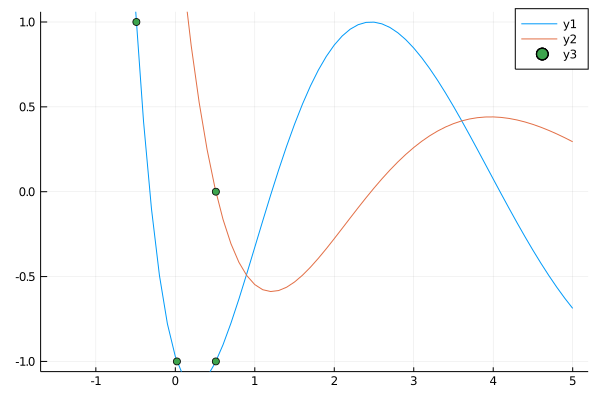

1×2 Array{Float64,2}:
 0.51  1.0

1×2 Array{Float64,2}:
 1.0  1.0

1.0000000000000002

In [5]:
p = plot(x,map(mtr,Ts), yaxis = [-1,1])
plot!(x,map(t12,Ts), yaxis = [-1,1]);

α1 = Δroot(-1,1.0)
β1 = Δroot(-1,-1.0)
α2 = Δroot(1.0,-1.0)
z = T12root((α2+β1)/2)
(α1,β1,α2) |> display
z |> display
scatter!([α1,β1,α2,z],[1,-1,-1,0]) |> display
β1 = β1 - α1
α2 = α2 - α1
TT = T(z)
z = z - α1

if 1im*sqrt(1 - Δ(z)^2 |> complex) + 1/2*(TT[2,2]-TT[1,1]) |> abs < 1e-6
    σ = -1.0
else
    σ = 1.0
end

gaps = zeros(1,2); gaps[1,1] = β1; gaps[1,2] = α2
zs = zeros(1,2); zs[1,1] = z; zs[1,2] = σ

gaps |> display
zs |> display

zs[1,1] = gaps[1,2]

In [24]:
gaps |> print

[0.51 1.0]

In [25]:
zs |> print

[0.9999999999999997 1.0]

In [26]:
gaps[1,2] - zs[1,1] |> print

3.3306690738754696e-16

In [27]:
β1 = 1-kell^2
α2 = 1.0
z = 1.0 - 3e-16
gaps = zeros(1,2); gaps[1,1] = β1; gaps[1,2] = α2
zs = zeros(1,2); zs[1,1] = z; zs[1,2] = 1.0;

In [28]:
S = HyperellipticSurface(gaps,zs)

HyperellipticSurface([0.51 1.0], 1, [0.9999999999999997 1.0], Complex{Float64}[0.0 + 4.393098136276018e-8im], Complex{Float64}[0.0 + 1.702119991914266im], Complex{Float64}[0.0 + 5.140402375581083im], Complex{Float64}[0.0 + 0.02050059935952531im])

In [29]:
S.Ωx

1-element Array{Complex{Float64},1}:
 0.0 + 1.702119991914266im

In [33]:
2*pi/tspan[2]

1.7021199919142658

In [ ]:
S = HyperellipticSurface(gaps,zs,1000)

In [ ]:
nM = (a,b) ->  (x -> (b-a)/2*x .+ (b+a)/2)
inM = (a,b) -> (x -> 2/(b-a)*x .- (b+a)/(b-a))

In [ ]:
inM = (a,b) -> (x -> 2/(b-a)*(x .- (b+a)/2))
inM(β1,α2)(α2)

In [ ]:
J(1,iM(β1,α2)(α2))

In [ ]:
function J(n,λ)
        if n == 0
            1 - acos(λ)/pi
        else
            - sqrt(2)/pi*sin(n*acos(λ))/n
        end
    end

function J(f,a,b,n,λ)
    cs = transformT(map(f,M(a,b)(Ugrid(n))))
    out = 0im
    for i = 1:length(cs)
        out += cs[i]*J(i-1,iM(a,b)(λ))
    end
    cs[1] - out
end

In [ ]:
BA = BakerAkhiezerFunction(S,60,1e-14);

In [ ]:
x = 0:.01:2*tspan[2]
yr = map(x -> KdV(BA,x,0.) - α1, x) # undo the shift
y = map(q0,x)
plot(x,yr |> real)
plot!(x,y, legend = false)

In [ ]:
abs.(y - yr) |> maximum

In [ ]:
plot(x, abs.(y - yr) )

## RK4

In [ ]:
include("./PeriodicKdV.jl")
using .PeriodicKdV
using LinearAlgebra, Plots, SparseArrays, Printf
using DifferentialEquations, SpecialFunctions, Elliptic

In [ ]:
kell = 0.7
κ = 1.0
tspan = (0.0,2*Elliptic.K(kell^2)/κ)
q0 = x -> 2*kell^2*κ^2*Elliptic.Jacobi.cn(κ*x,kell^2)^2

x = 0.0:0.01:tspan[2]
y = map(q0,x)
plot(x,y, legend = false) |> display


function F(u,p,t)
    return [ u[2];
    (-p[1] - p[2](t))*u[1];
    u[4];
    -u[1] + (-p[1] - p[2](t))*u[3]]
#     du = copy(u)
#     du[1] = u[2]
#     du[2] = (-p[1] - p[2](t))*u[1]
#     du[3] = u[4] # derivative wrt p[1]
#     du[4] = -u[1] + (-p[1] - p[2](t))*u[3]
#     return du
end


function rk4(F,k,t,c)
    f1 = k*F(c,t)
    f2 = k*F(c + .5*f1, t + .5*k)
    f3 = k*F(c + .5*f2, t + .5*k)
    f4 = k*F(c + f3, t + k)
    return c + 1/6.0*(f1 + 2.0*f2 + 2.0*f3 + f4)
end

function T(λ,q0,tspan)
    k = (tspan[2] - tspan[1])*1e-4
    ts = tspan[1]:k:tspan[2]
    j = length(ts)
    u0 = [1.0;0.0;0.0;0.0]
    v0 = [0.0;1.0;0.0;0.0]
    rhs = (u,t) -> F(u,[λ,q0],t)
    for i = 1:j
        #u0 += k*rhs(u0,t)
        #v0 += k*rhs(v0,t)
        u0 = rk4(rhs,k,t,u0)
        v0 = rk4(rhs,k,t,v0)
        t += k
    end
    hcat(u0,v0)
end

In [ ]:
tspan[2]

In [ ]:
T(1.0,q0,tspan)

In [ ]:
x = -1.5:.1:5
Ts = map( x -> T(x,q0,tspan),x);
mtr = T -> (T[1,1] + T[2,2])/2.0
t12 = T -> T[1,2]

In [ ]:
p = plot(x,map(mtr,Ts), yaxis = [-1,1])
plot!(x,map(t12,Ts), yaxis = [-1,1])
#plot!(x,map(dmtr,Ts), )

In [ ]:
function Δ(λ)
    Ts = T(λ,q0,tspan)
   (Ts[1,1] + Ts[2,2])/2
end

function Δ_newton_step(λ,σ)
    Ts = T(λ,q0,tspan)
    δ = (Ts[1,1] + Ts[2,2] - 2*σ)/(Ts[3,1] + Ts[4,2])
    (λ - δ,δ)
end

function Δroot(λ,σ)
    λ0 = λ
    for i = 1:100
        (λ0,δ) = Δ_newton_step(λ0,σ)
        if abs(δ) < 1e-15
            break
        end
        if i == 100
            @warn "Max iter"
        end
    end
    λ0
end

function T12(λ)
    Ts = T(λ,q0,tspan)
    Ts[1,2]
end

function T12_newton_step(λ)
    Ts = T(λ,q0,tspan)
    δ = Ts[1,2]/Ts[3,2]
    (λ - δ,δ)
end

function T12root(λ)
    λ0 = λ
    for i = 1:100
        (λ0,δ) = T12_newton_step(λ0)
        if abs(δ) < 1e-10
            break
        end
        if i == 100
            @warn "Max iter"
        end
    end
    λ0
end

In [ ]:
α1 = Δroot(-1,1.0)
β1 = Δroot(-1,-1.0)
α2 = Δroot(0.0,-1.0)
z = T12root((α2+β1)/2)
(α1,β1,α2) |> display
z |> display
scatter!([α1,β1,α2,z],[1,-1,-1,0]) |> display
β1 = β1 - α1
α2 = α2 - α1
z = z - α1

Ts = T(z,q0,tspan)
if 1im*sqrt(1 - Δ(z)^2 |> complex) + 1/2*(Ts[2,2]-Ts[1,1]) |> abs < 1e-6
    σ = -1.0
else
    σ = 1.0
end

gaps = zeros(1,2); gaps[1,1] = β1; gaps[1,2] = α2
zs = zeros(1,2); zs[1,1] = z; zs[1,2] = σ

gaps |> display
zs |> display

In [ ]:
α2-β1

In [ ]:
κ^2*kell^2

In [ ]:
S = HyperellipticSurface(gaps,zs)

In [ ]:
BA = BakerAkhiezerFunction(S,10,1e-13);

In [ ]:
x = 0:.01:2*tspan[2]
yr = map(x -> KdV(BA,x,0.) - α1, x) # undo the shift
y = map(q0,x)
plot(x,yr |> real)
plot!(x,y, legend = false)

In [ ]:
plot(x, abs.(y - yr) )

In [ ]:
(KdV(BA,0.,0.) - shift)/(α2-β1)

In [ ]:
2*(α2-β1)

In [ ]:
h = 0.00001;
(T(1.0+h,q0)[1:2,1:2] - T(1.0-h,q0)[1:2,1:2])/(2h)

In [ ]:
plot(x,map(x -> x[1,1],Ts))
plot!(x,map(x -> x[3,1],Ts))

In [ ]:
x = 0:.1:50
y = map( z -> Δ(z,q0)[2] , x)
plot(x,y)

In [ ]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

In [ ]:
function T(λ,q0)
    tspan = (0.0,pi)
    u0 = [1.0;0.0;0.0;0.0]
    v0 = [0.0;1.0;0.0;0.0]
    probu = ODEProblem(F,u0,tspan,[λ,q0])
    probv = ODEProblem(F,v0,tspan,[λ,q0])
    u = solve(probu, rtol = 1e-15, atol = 1e-15);
    v = solve(probv, rtol = 1e-15, atol = 1e-15);
    hcat(u.u[end],v.u[end])
end

In [ ]:
Pkg.status("DifferentialEquations")